In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

In [2]:
fn = '../input/wikipedia_edits.csv'
df = pd.read_csv(fn)

In [3]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [4]:
df

,title,parentid,revid,timestamp,user,userid,size,recipient,year,rank,country,career,tied
0,50_Cent,858765697,858858564,2018-09-10 02:52:25+00:00,ProspectIV,33893830.0,132452,50 Cent,2006,8,United States,Musician,0
1,50_Cent,858673799,858765697,2018-09-09 13:11:00+00:00,ProspectIV,33893830.0,132476,50 Cent,2006,8,United States,Musician,0
2,50_Cent,858673121,858673799,2018-09-08 21:46:42+00:00,ProspectIV,33893830.0,132444,50 Cent,2006,8,United States,Musician,0
3,50_Cent,858673016,858673121,2018-09-08 21:39:37+00:00,ProspectIV,33893830.0,132345,50 Cent,2006,8,United States,Musician,0
4,50_Cent,858469414,858673016,2018-09-08 21:38:24+00:00,ProspectIV,33893830.0,132345,50 Cent,2006,8,United States,Musician,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
789338,U2,383222001,74600,2002-02-25 15:43:11+00:00,Conversion script,0.0,406,U2,2011,4,Republic of Ireland,Musicians,0
789339,U2,383221849,383222001,2001-12-19 22:47:40+00:00,144.132.75.xxx,0.0,402,U2,2011,4,Republic of Ireland,Musicians,0
789340,U2,292008,292009,2001-12-12 08:28:48+00:00,202.161.127.xxx,0.0,654,U2,2011,4,Republic of Ireland,Musicians,0
789341,U2,292007,292008,2001-12-03 17:45:09+00:00,193.133.134.xxx,0.0,409,U2,2011,4,Republic of Ireland,Musicians,0


In [5]:
df['date'] = df['timestamp'].dt.date

In [6]:
df.head()

,title,parentid,revid,timestamp,user,userid,size,recipient,year,rank,country,career,tied,date
0,50_Cent,858765697,858858564,2018-09-10 02:52:25+00:00,ProspectIV,33893830.0,132452,50 Cent,2006,8,United States,Musician,0,2018-09-10
1,50_Cent,858673799,858765697,2018-09-09 13:11:00+00:00,ProspectIV,33893830.0,132476,50 Cent,2006,8,United States,Musician,0,2018-09-09
2,50_Cent,858673121,858673799,2018-09-08 21:46:42+00:00,ProspectIV,33893830.0,132444,50 Cent,2006,8,United States,Musician,0,2018-09-08
3,50_Cent,858673016,858673121,2018-09-08 21:39:37+00:00,ProspectIV,33893830.0,132345,50 Cent,2006,8,United States,Musician,0,2018-09-08
4,50_Cent,858469414,858673016,2018-09-08 21:38:24+00:00,ProspectIV,33893830.0,132345,50 Cent,2006,8,United States,Musician,0,2018-09-08


In [8]:
df['date_year'] = df['timestamp'].dt.year

In [10]:
df_manny = df[df['title']=='Manny_Pacquiao']

In [11]:
df_manny.head()

,title,parentid,revid,timestamp,user,userid,size,recipient,year,rank,country,career,tied,date,date_year
477505,Manny_Pacquiao,858923775,858924908,2018-09-10 15:07:25+00:00,MroWikipedian,34478357.0,96240,Manny Pacquiao,2015,2,Philippines,Sportsperson (Boxing),0,2018-09-10,2018
477506,Manny_Pacquiao,858393401,858923775,2018-09-10 14:57:58+00:00,MroWikipedian,34478357.0,95925,Manny Pacquiao,2015,2,Philippines,Sportsperson (Boxing),0,2018-09-10,2018
477507,Manny_Pacquiao,858392991,858393401,2018-09-06 21:20:17+00:00,Tbb 911,7097402.0,95879,Manny Pacquiao,2015,2,Philippines,Sportsperson (Boxing),0,2018-09-06,2018
477508,Manny_Pacquiao,858165549,858392991,2018-09-06 21:16:11+00:00,Tbb 911,7097402.0,95954,Manny Pacquiao,2015,2,Philippines,Sportsperson (Boxing),0,2018-09-06,2018
477509,Manny_Pacquiao,858165135,858165549,2018-09-05 14:23:28+00:00,PinoyBoxing11,15621670.0,95951,Manny Pacquiao,2015,2,Philippines,Sportsperson (Boxing),0,2018-09-05,2018


In [12]:
df_daily = df_manny.groupby('date')['revid'].agg([len])

In [13]:
df_daily.head()

,len
date,
2004-08-20,5
2004-09-06,4
2004-09-12,1
2004-10-14,1
2004-10-22,1


In [14]:
x = df_daily.index
y = df_daily['len']

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


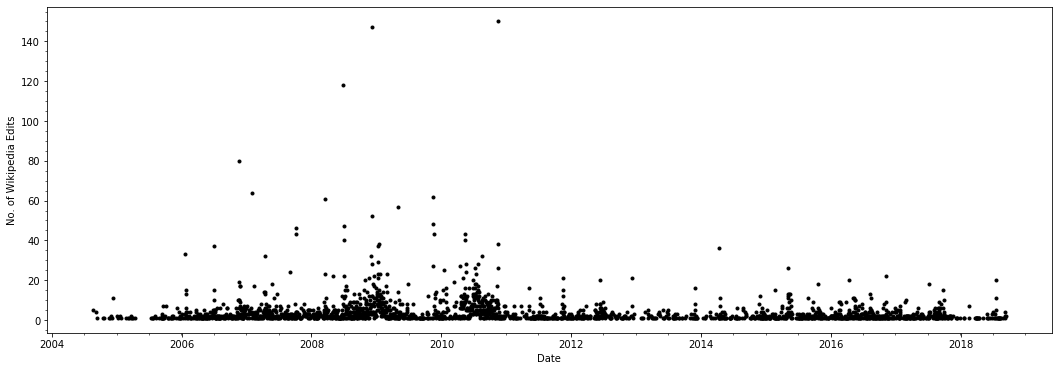

In [15]:
plt.figure(figsize=(18, 6))
plt.plot(x, y, 'k.')
plt.ylabel('No. of Wikipedia Edits')
plt.xlabel('Date')
plt.minorticks_on()